In [40]:
from DataLoading import DataLoader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_loader = DataLoader("config.share")
df = data_loader.load_table(device_id="1a9da8fa-6fa8-49f3-8aaa-420b34eefe57", year_month=[
    "202101", "202102","202103", "202104", "202105", "202106", "202107", "202108", "202109", "202110", "202111", "202112"])

In [41]:
df.head(10)

,device_id,dataprofile_id,cloud_received_time,sample_time,year,year_month,year_month_day,influx_migration_source_filename,T1_remote_K,T2_embeded_K,...,SpDeltaT_applied_K,Error_Status_Cloud,DDC_BUS_Sp_Write,dT_Manager_Ste,Active_dT_Manager_total_h,DeltaT_K,DDC_Sp_V,OperatingHours,Flow_Volume_total_m3,Y3AnalogInputValue
0,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-14 15:55:33.769,2021-09-14 15:51:01.377999,2021,202109,20210914,2021-09-14_13.gz,299.875258,300.899742,...,6.0,0.0,100.0,1,0.0,1.024485,0.015390,12866.327616,742.707355,NaN
1,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-04 08:45:35.906,2021-09-04 08:41:33.520000,2021,202109,20210904,2021-09-04_06.gz,298.681959,299.593041,...,6.0,0.0,100.0,1,0.0,0.911082,0.012943,12619.169531,742.678618,NaN
2,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-04 10:16:06.727,2021-09-04 10:15:35.708999,2021,202109,20210904,2021-09-04_08.gz,299.135567,299.961598,...,6.0,0.0,100.0,1,0.0,0.826031,0.008641,12620.736881,742.679062,NaN
3,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-15 12:12:29.361,2021-09-15 12:07:56.524999,2021,202109,20210915,2021-09-15_10.gz,299.112371,300.067268,...,6.0,0.0,100.0,1,0.0,0.954897,0.013516,12886.609676,742.708612,NaN
4,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-15 12:42:39.525,2021-09-15 12:38:06.778000,2021,202109,20210915,2021-09-15_10.gz,299.102062,300.051804,...,6.0,0.0,100.0,1,0.0,0.949742,0.012697,12887.112533,742.708612,NaN
5,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-15 14:03:06.674,2021-09-15 14:02:05.412999,2021,202109,20210915,2021-09-15_12.gz,299.045361,300.051804,...,6.0,0.0,100.0,1,0.0,1.006443,0.021427,12888.512144,742.708743,NaN
6,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-15 15:18:32.097,2021-09-15 15:14:30.059000,2021,202109,20210915,2021-09-15_13.gz,298.986082,299.948711,...,6.0,0.0,100.0,1,0.0,0.962629,0.024557,12889.718998,742.708899,NaN
7,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-15 16:23:54.745,2021-09-15 16:19:22.405000,2021,202109,20210915,2021-09-15_14.gz,299.331443,300.299227,...,6.0,0.0,100.0,1,0.0,0.967784,0.011944,12890.800194,742.708909,NaN
8,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-01 06:25:11.330,2021-09-01 06:23:08.356999,2021,202109,20210901,2021-09-01_04.gz,297.295361,298.113660,...,6.0,0.0,100.0,1,0.0,0.818299,0.027796,12544.862509,738.413004,NaN
9,1a9da8fa-6fa8-49f3-8aaa-420b34eefe57,energyvalve3/1.11,2021-09-05 10:29:23.808,2021-09-05 10:27:52.039000,2021,202109,20210905,2021-09-05_08.gz,298.594330,299.575000,...,6.0,0.0,100.0,1,0.0,0.980670,0.029818,12644.941455,742.682199,NaN


In [42]:
# sort df by sample time
df = df.sort_values("sample_time")

In [43]:
# visualize sum of Cooling_E_J and Heating_E_J over time

df["sample_time"] = pd.to_datetime(df["sample_time"])
df["sample_time"] = df["sample_time"].dt.date
df["Cooling_E_J"] = df["Cooling_E_J"].astype(float)
df["Heating_E_J"] = df["Heating_E_J"].astype(float)

df_grouped = df.groupby("sample_time", as_index=False)[["Cooling_E_J", "Heating_E_J"]].sum()

# Apply cumulative sum so it only goes up
df_grouped["Cooling_E_J"] = df_grouped["Cooling_E_J"].cumsum()
df_grouped["Heating_E_J"] = df_grouped["Heating_E_J"].cumsum()

print(df_grouped.head())

  sample_time   Cooling_E_J   Heating_E_J
0  2021-01-01  9.695348e+09  2.380909e+13
1  2021-01-02  1.981767e+10  4.871680e+13
2  2021-01-03  2.993646e+10  7.383114e+13
3  2021-01-04  4.005525e+10  1.002368e+14
4  2021-01-05  5.017757e+10  1.279741e+14


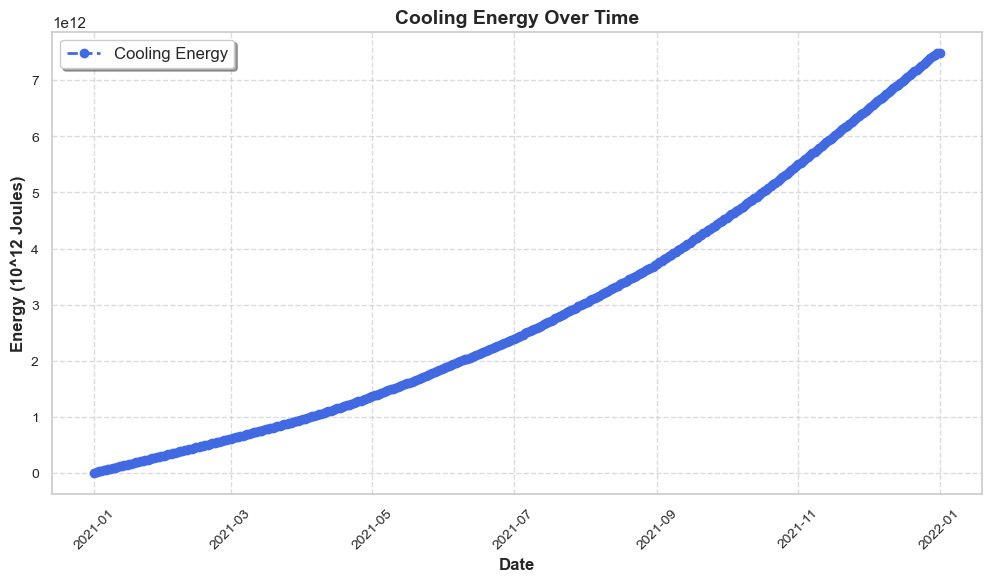

In [48]:
# Set Seaborn style for a clean white grid theme
sns.set_theme(style="whitegrid")

# Define plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped["sample_time"], df_grouped["Cooling_E_J"], label="Cooling Energy", color="royalblue", marker="o", linestyle="--", markersize=6, linewidth=2)

# Enhance styling
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Energy (10^12 Joules)", fontsize=12, fontweight="bold")
plt.title("Cooling Energy Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, fancybox=True)

# Display plot
plt.show()


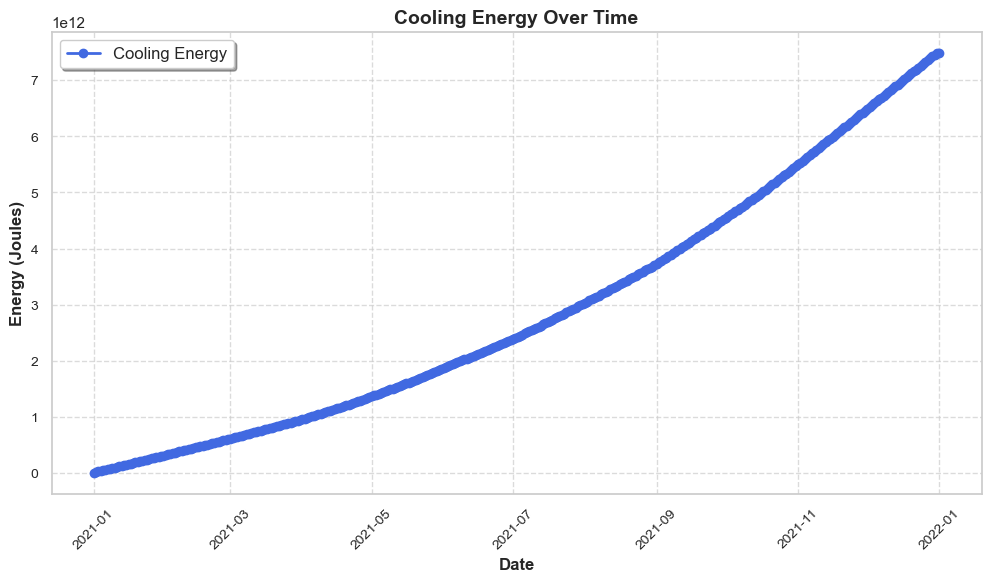

In [45]:

# Set Seaborn style for a clean white grid theme
sns.set_theme(style="whitegrid")

# Define plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped["sample_time"], df_grouped["Cooling_E_J"], label="Cooling Energy", color="royalblue", marker="o", linestyle="-", markersize=6, linewidth=2)

# Enhance styling
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("Energy (Joules)", fontsize=12, fontweight="bold")
plt.title("Cooling Energy Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, fancybox=True)

# Display plot
plt.show()

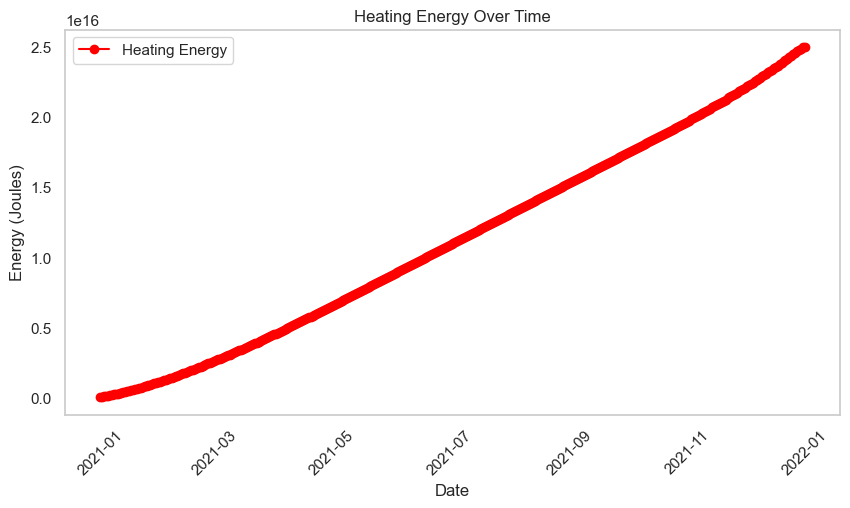

In [46]:
# Plot Heating Energy
plt.figure(figsize=(10, 5))
plt.plot(df_grouped["sample_time"], df_grouped["Heating_E_J"], label="Heating Energy", color="red", marker="o")
plt.xlabel("Date")
plt.ylabel("Energy (Joules)")
plt.title("Heating Energy Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


  sample_time   Heating_E_J  CO2_Emissions_kg
0  2021-01-01  2.380909e+13      1.984091e+06
1  2021-01-02  4.871680e+13      4.059733e+06
2  2021-01-03  7.383114e+13      6.152595e+06
3  2021-01-04  1.002368e+14      8.353066e+06
4  2021-01-05  1.279741e+14      1.066451e+07


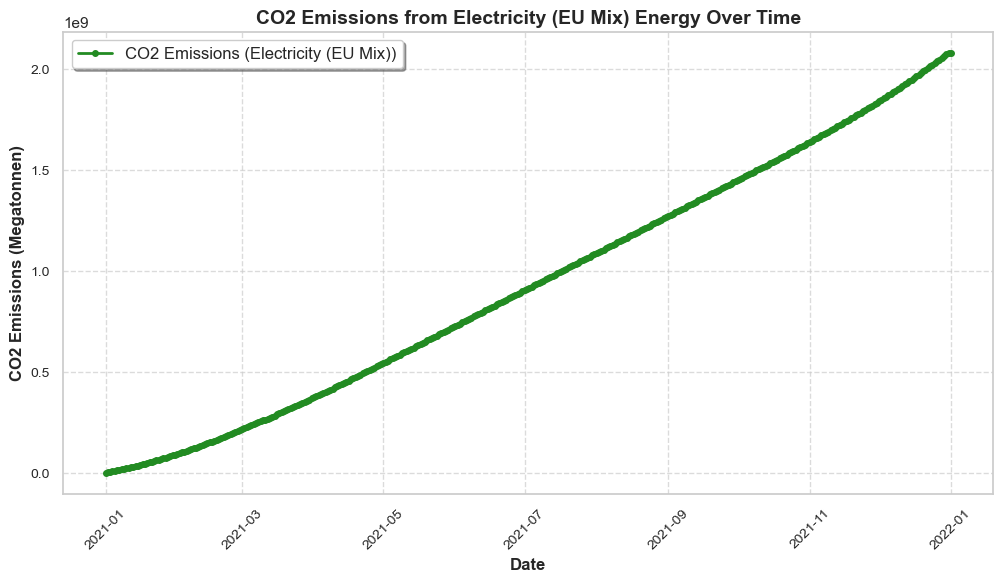

In [47]:
# Energy source emission factors in kg CO₂ per kWh (source: IPCC, EPA)
CO2_EMISSION_FACTORS = {
    "Coal": 0.95,        # kg CO₂ per kWh
    "Natural Gas": 0.45,  # kg CO₂ per kWh
    "Oil": 0.74,         # kg CO₂ per kWh
    "Electricity (EU Mix)": 0.30,  # kg CO₂ per kWh
    "Electricity (US Mix)": 0.40,  # kg CO₂ per kWh
    "Renewable (Solar/Wind)": 0.05,  # kg CO₂ per kWh
}

def convert_energy_to_co2(df, energy_column, energy_type):
    """
    Converts energy consumption to CO₂ emissions.

    :param df: Pandas DataFrame containing energy data.
    :param energy_column: Column name containing energy consumption (in Joules).
    :param energy_type: Type of energy source (must be in CO2_EMISSION_FACTORS).
    :return: Pandas DataFrame with added 'CO2_Emissions_kg' column.
    """
    if energy_type not in CO2_EMISSION_FACTORS:
        raise ValueError(f"Unknown energy type: {energy_type}. Choose from {list(CO2_EMISSION_FACTORS.keys())}")

    # Convert Joules to kWh (1 kWh = 3.6 million Joules)
    df["Energy_kWh"] = df[energy_column] / 3.6e6

    # Calculate CO₂ emissions
    df["CO2_Emissions_kg"] = df["Energy_kWh"] * CO2_EMISSION_FACTORS[energy_type]

    return df

# Example usage:
energy_type = "Electricity (EU Mix)"  # User input (can be replaced with input())
df = convert_energy_to_co2(df_grouped, "Heating_E_J", energy_type)

# Display first few rows
print(df[["sample_time", "Heating_E_J", "CO2_Emissions_kg"]].head())
# Set Seaborn style for a clean white grid theme
sns.set_theme(style="whitegrid")

# Define plot
plt.figure(figsize=(12, 6))
plt.plot(df["sample_time"], df["CO2_Emissions_kg"], label=f"CO2 Emissions ({energy_type})", color="forestgreen", marker="o", linestyle="-", markersize=4, linewidth=2)

# Enhance styling
plt.xlabel("Date", fontsize=12, fontweight="bold")
plt.ylabel("CO2 Emissions (Megatonnen)", fontsize=12, fontweight="bold")
plt.title(f"CO2 Emissions from {energy_type} Energy Over Time", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True, fancybox=True)

# Display plot
plt.show()